#Decision Trees and Random Forests

## The data

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", \
                 "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
label_name = "num"

column_names = feature_names + [label_name]

df = pd.read_csv(url, names=feature_names + [label_name])
df = df[~df.eq("?").any(1)]

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [3]:
# from sklearn.datasets import load_digits

# dataset = load_digits()

# feature_names = np.arange(dataset.data.shape[1]).astype('str').tolist()
# label_name = "class"

# df = pd.DataFrame(dataset.data, columns=feature_names)
# df[label_name] = dataset.target

# column_names = feature_names + [label_name]

# df

In [4]:
# from sklearn.datasets import load_breast_cancer

# dataset = load_breast_cancer()

# feature_names = dataset.feature_names
# label_name = "class"

# df = pd.DataFrame(dataset.data, columns=feature_names)
# df[label_name] = dataset.target_names[dataset.target]

# #column_names = feature_names + [label_name]

# df

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
import plotly.express as px

fig = px.scatter_matrix(df, color=label_name)
fig.update_layout(
    autosize=False,
    width=df.shape[1] * 200,
    height=df.shape[1] * 200,
    margin=dict(l=0, r=0, t=0, b=0)
)
fig.show()

In [7]:
for column in df.columns[:-1]:
  fig = px.histogram(df, column, color=label_name, marginal='box')
  fig.show()
fig = px.histogram(df, label_name)
fig.show()

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=42)

X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## The Gini index

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

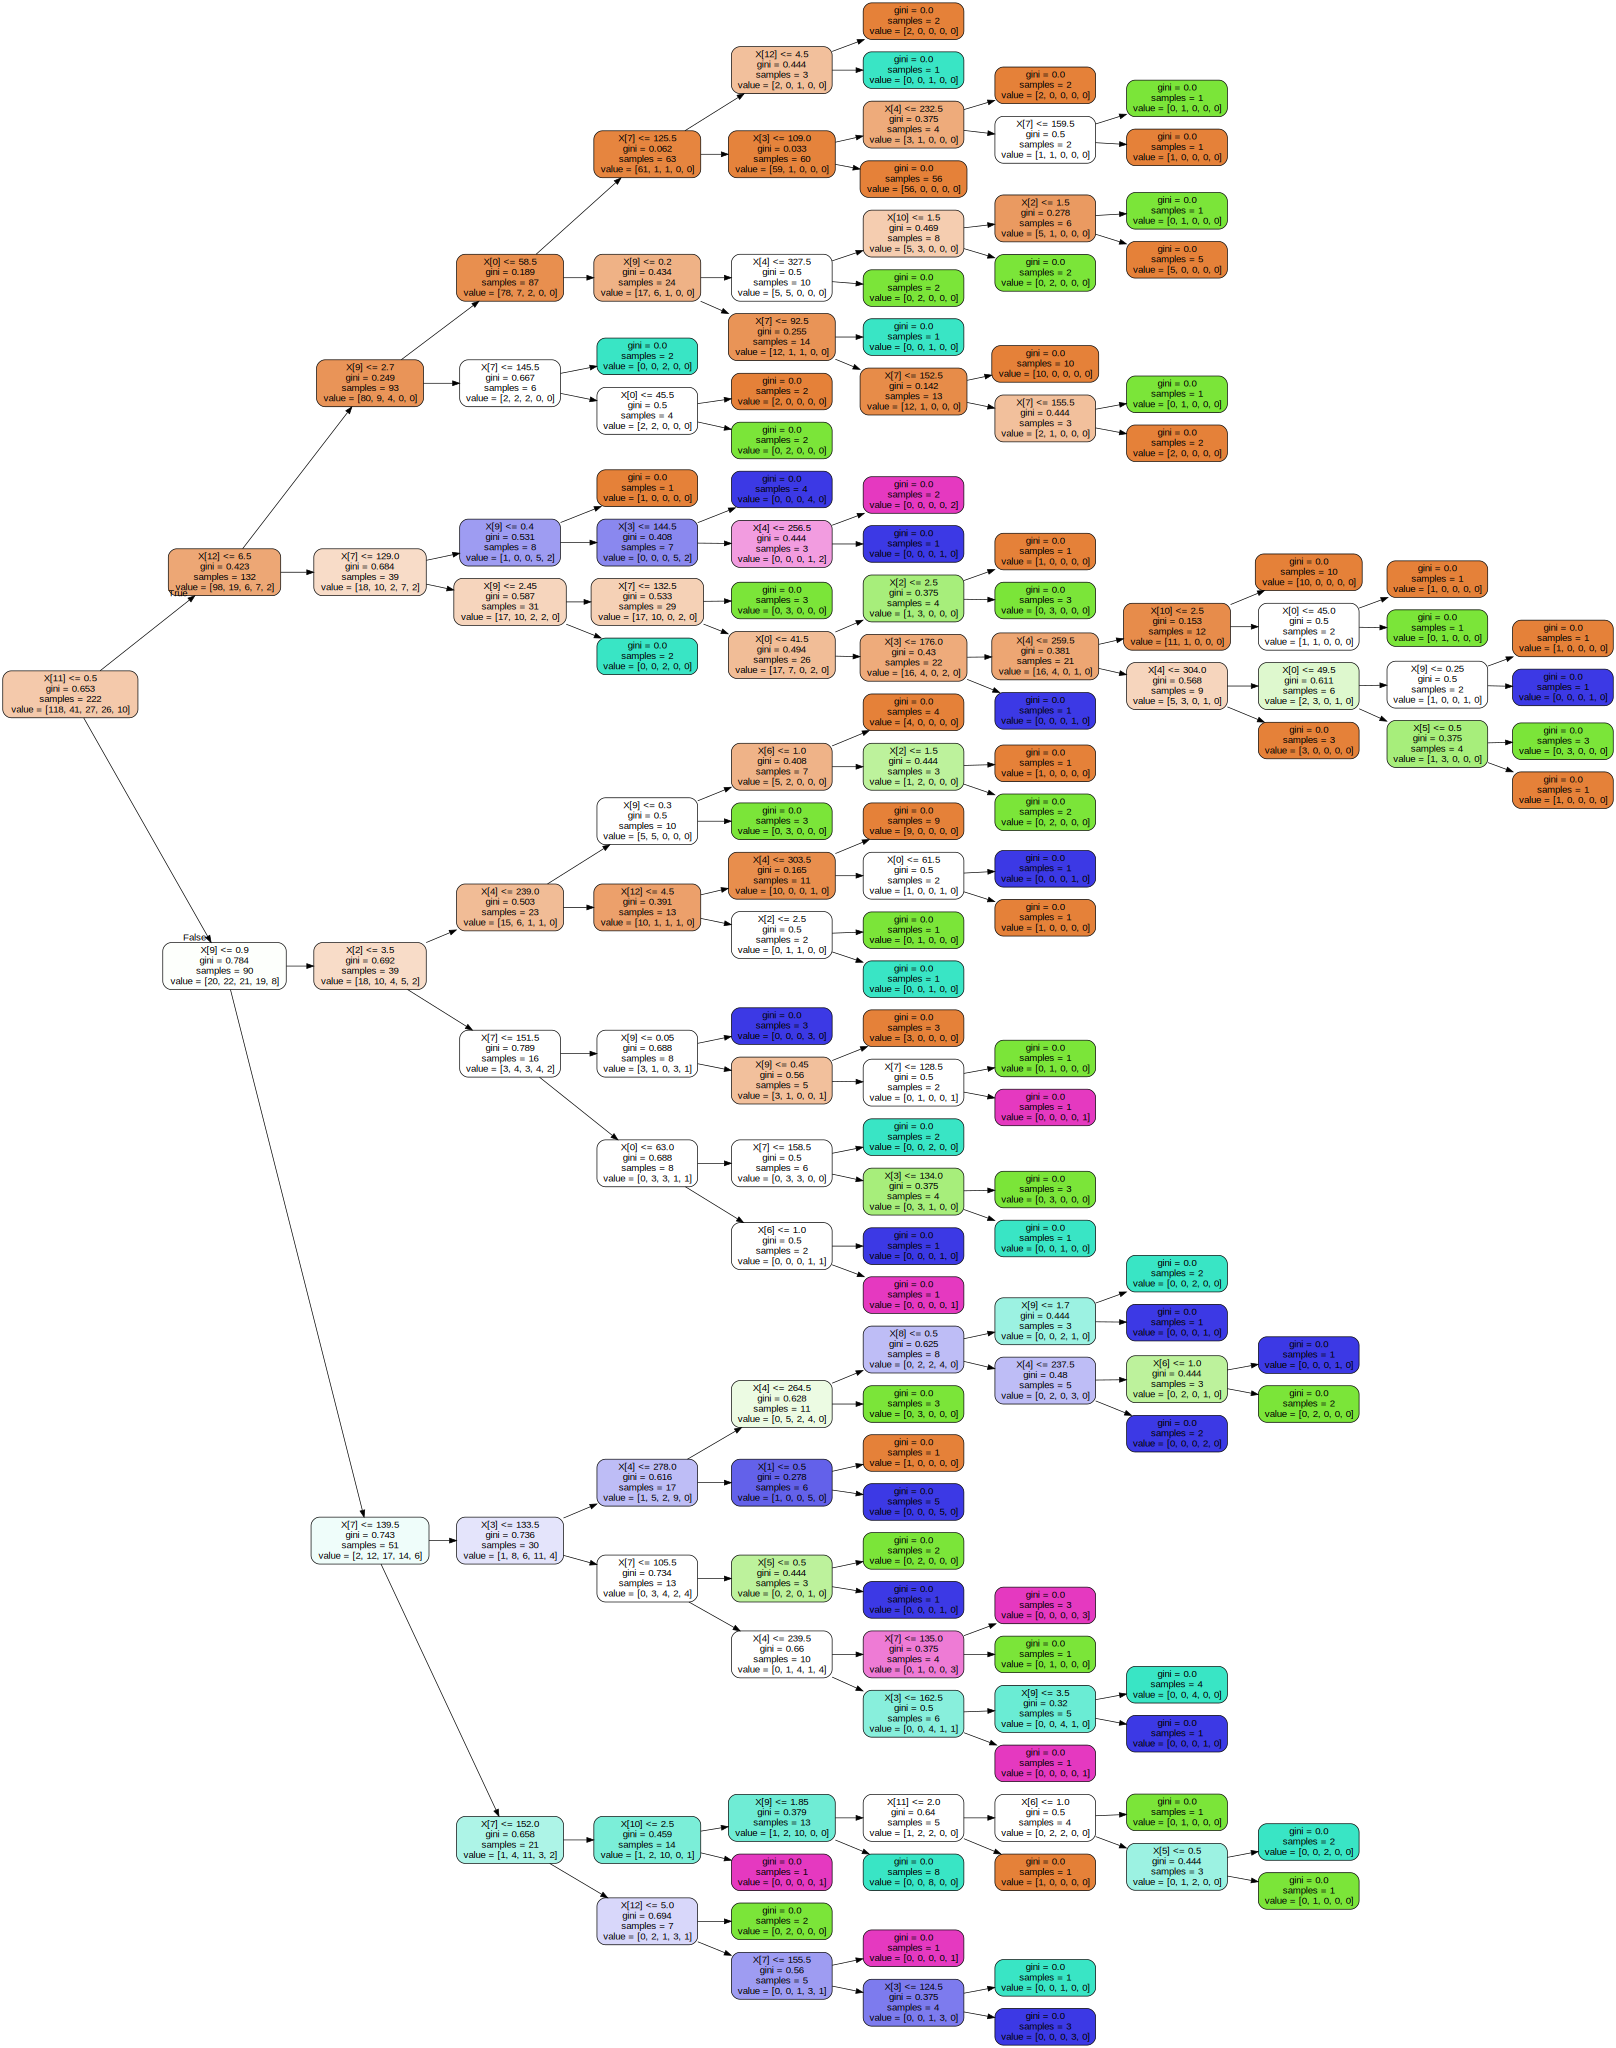

In [10]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree,
                           out_file=None, 
                           filled=True,
                           rounded=True,  
                           rotate=True)  

display(graphviz.Source(dot_data))

## Decision trees have high variance

In [11]:
from sklearn.metrics import classification_report, plot_confusion_matrix

yhat_train = dtree.predict(X_train)

print("Training data:")
print(classification_report(y_train, yhat_train))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        10

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



In [12]:
yhat_test  = dtree.predict(X_test)

print("Test data:")
print(classification_report(y_test, yhat_test))

Test data:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.21      0.23      0.22        13
           2       0.22      0.25      0.24         8
           3       0.38      0.33      0.35         9
           4       0.00      0.00      0.00         3

    accuracy                           0.55        75
   macro avg       0.32      0.32      0.32        75
weighted avg       0.56      0.55      0.55        75



Training data:


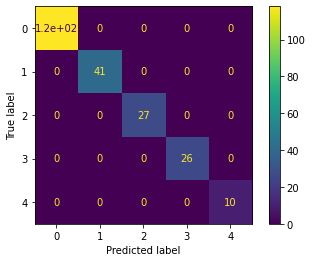

In [13]:
print("Training data:")
plot_confusion_matrix(dtree, X_train, y_train)

Test data:


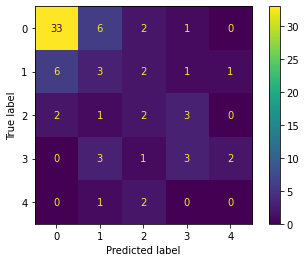

In [14]:
print("Test data:")
plot_confusion_matrix(dtree, X_test, y_test)

In [15]:
from sklearn.utils import resample

num_trials = 100

yhat_test_temp = np.tile(y_test[:, None], (1, num_trials))

for i in range(num_trials):
  X_train_temp, y_train_temp = resample(X_train, y_train, replace=False, \
                                        n_samples=X_train.shape[0] // 2)
  dtree.fit(X_train_temp, y_train_temp)
  yhat_test_temp[:, i] = dtree.predict(X_test)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(y)

num_classes = le.classes_.shape[0]

freqs = np.zeros((y_test.shape[0], num_classes))
for i, c in enumerate(le.classes_):
  freqs[:, i] += (yhat_test_temp == c).astype("int").sum(axis=1)

In [17]:
epsilon = np.finfo(float).eps

corrects = freqs[np.arange(y_test.shape[0]), le.inverse_transform(y_test)]
freqs_b = np.c_[corrects, num_trials - corrects]
ratio_b = freqs_b.astype('float') / num_trials
ratio_b[ratio_b == 0] = epsilon
entropy_b = -(ratio_b * np.log(ratio_b)).sum(axis=1)

ratio = freqs.astype('float') / num_trials
ratio[ratio == 0] = epsilon
entropy = -(ratio * np.log(ratio)).sum(axis=1)

In [18]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=entropy_b, name='binary entropy', histnorm='probability'))
fig.add_trace(go.Histogram(x=entropy,   name='entropy',        histnorm='probability'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

## Decision tree hyperparameters

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [19]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

## Pre-pruning

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

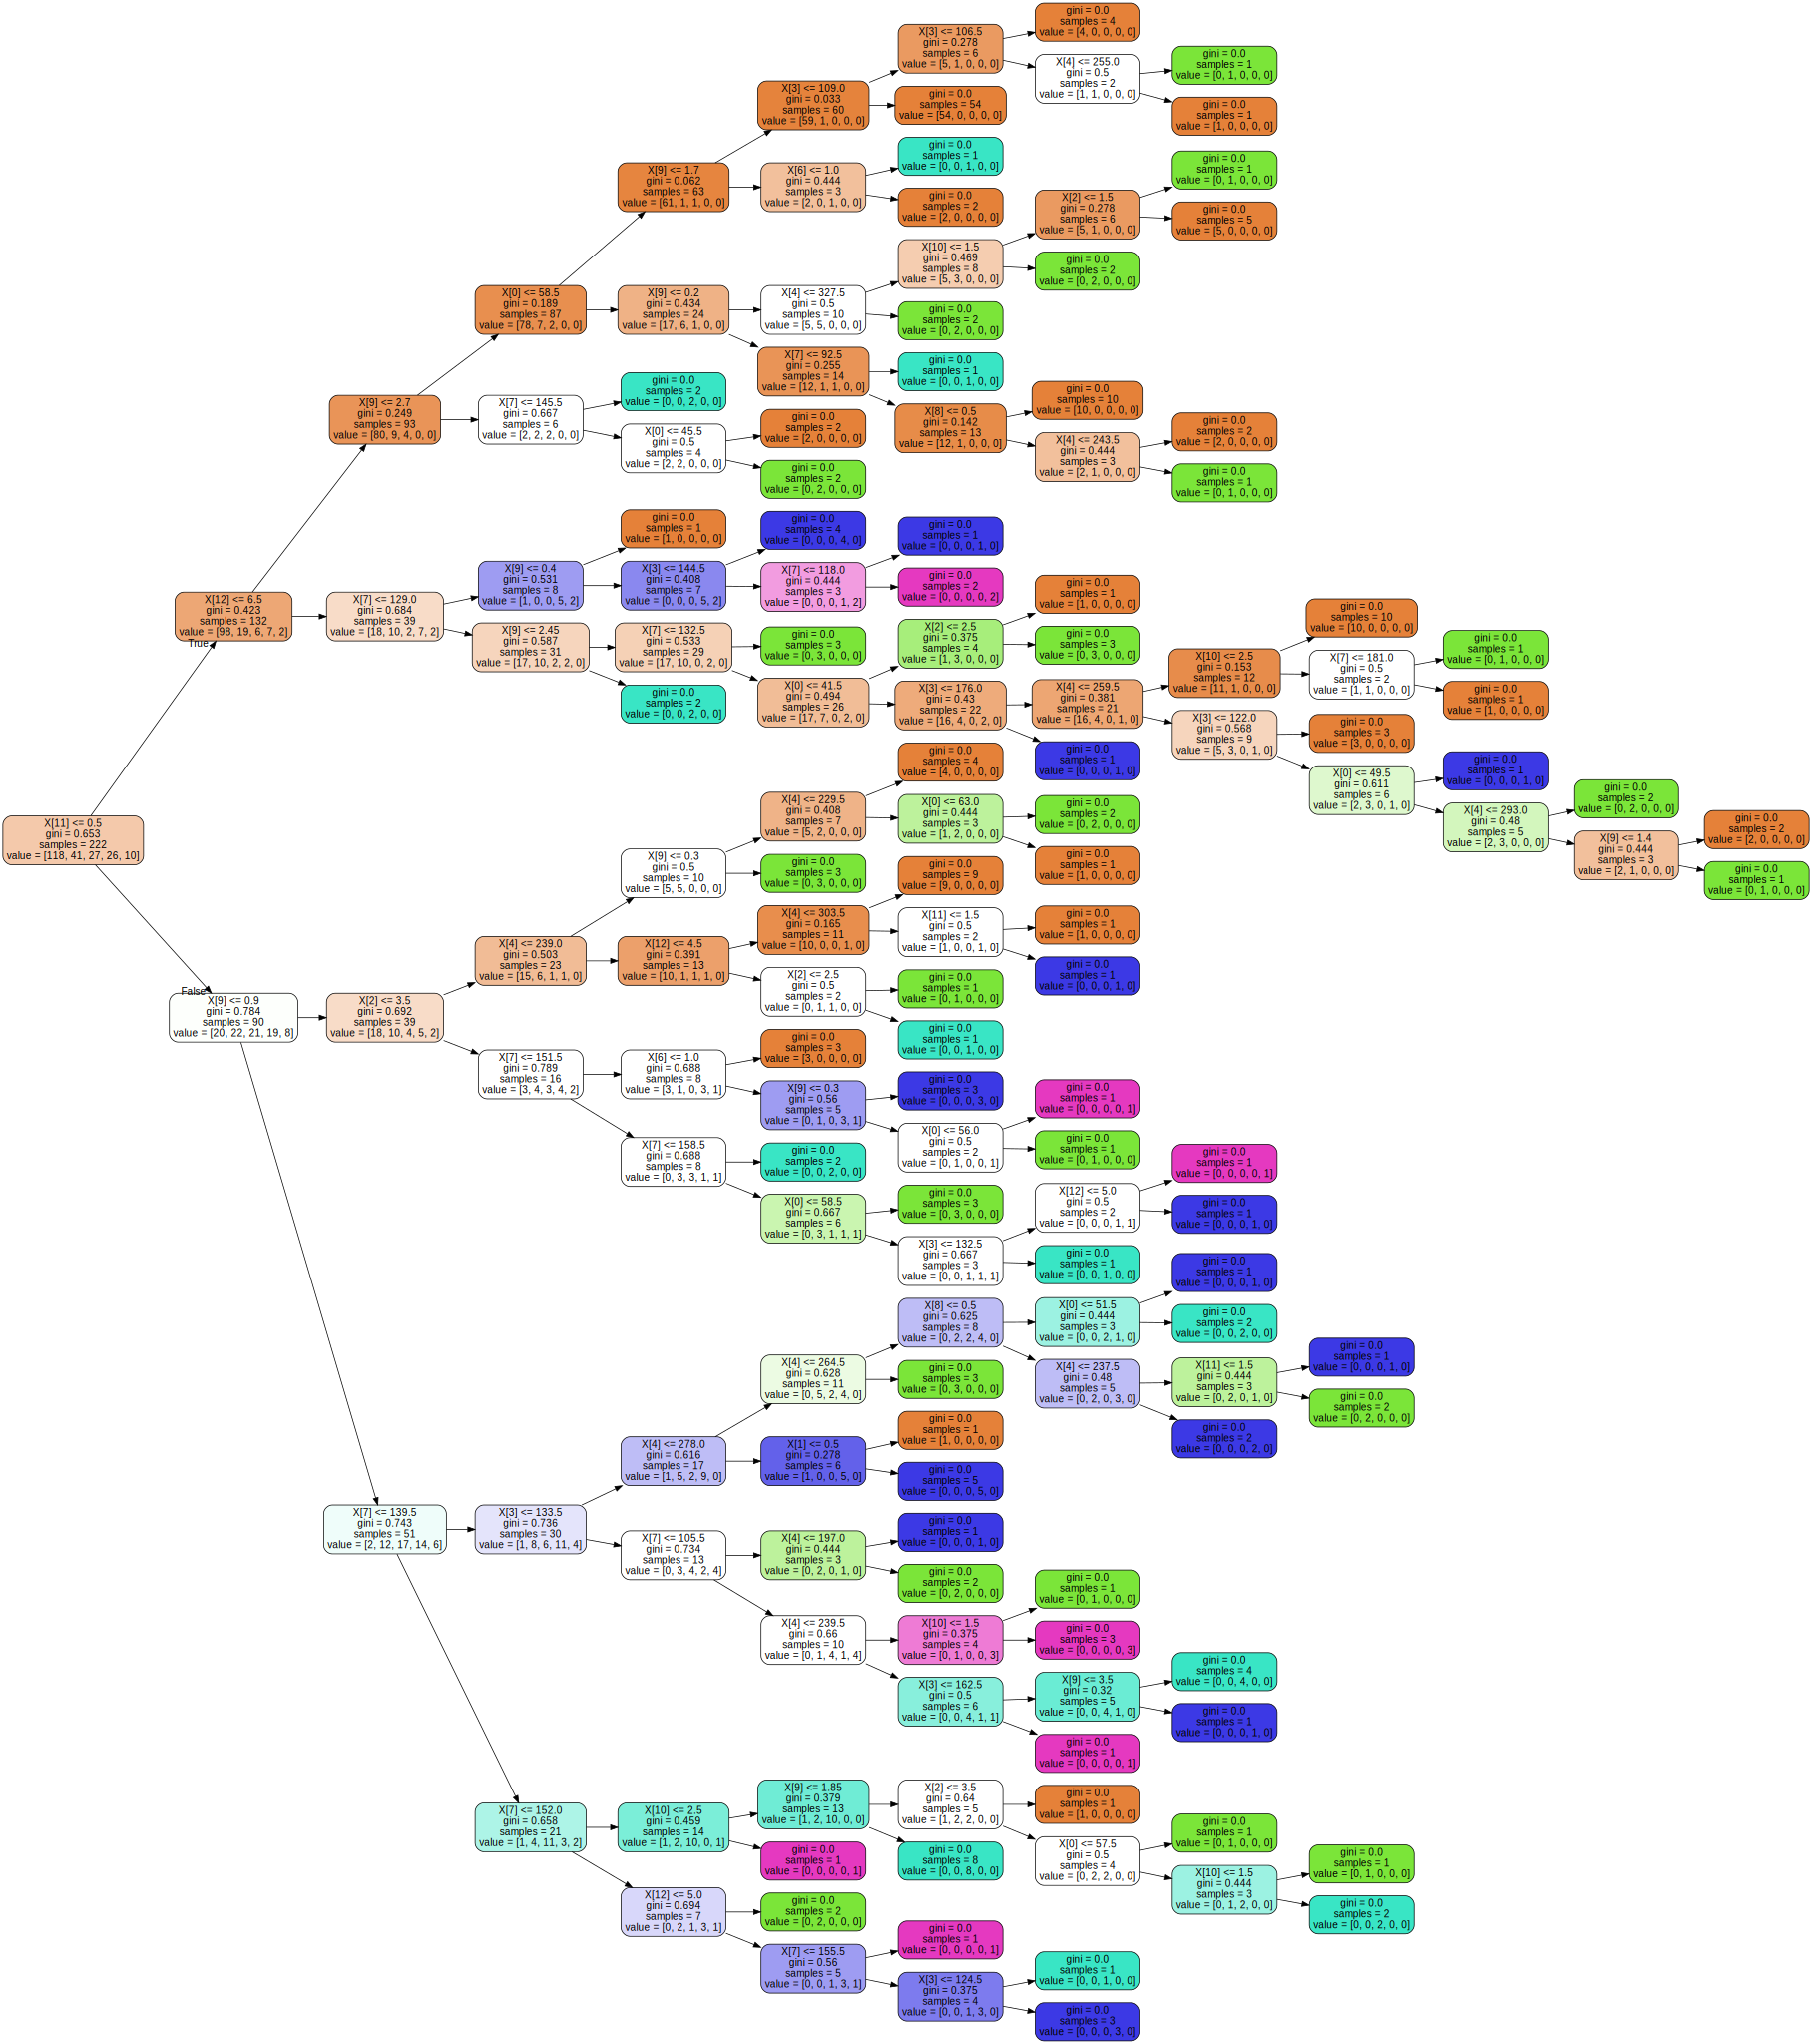

In [21]:
dot_data = export_graphviz(dtree,
                           out_file=None, 
                           filled=True,
                           rounded=True,  
                           rotate=True)  

display(graphviz.Source(dot_data))

In [22]:
dtree.get_depth()

12

In [23]:
dtree.get_n_leaves()

77

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
hyperparameter_grid = {
    'max_depth':             np.arange(1, 14),
#    'min_samples_split':     np.arange(2, 20),
#    'min_samples_leaf':      np.arange(1, 10),
#    'max_leaf_nodes':        np.arange(1, 140, 5),
#    'min_impurity_decrease': np.logspace(-1, -100, 11),
#    'min_impurity_split':    np.logspace(-1, -100, 11)
}

scoring = 'accuracy'
scoring_name = 'Accuracy'

In [26]:
search = GridSearchCV(DecisionTreeClassifier(), 
                      hyperparameter_grid, 
                      scoring,
                      n_jobs=-1,
                      cv=10)

search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9

In [27]:
search.cv_results_

{'mean_fit_time': array([0.00105734, 0.00139673, 0.0011342 , 0.00167198, 0.0021646 ,
        0.00255539, 0.0021548 , 0.00162141, 0.00166235, 0.00174139,
        0.00191786, 0.00257049, 0.00230551]),
 'mean_score_time': array([0.00069075, 0.00041292, 0.00041955, 0.00041733, 0.00041137,
        0.00040464, 0.00043066, 0.00107961, 0.00042667, 0.00039146,
        0.00059836, 0.0004024 , 0.00037243]),
 'mean_test_score': array([0.51857708, 0.55869565, 0.50059289, 0.46442688, 0.46422925,
        0.47806324, 0.44624506, 0.44644269, 0.43735178, 0.4284585 ,
        0.44189723, 0.44604743, 0.44209486]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  

In [28]:
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']

x_axis = hyperparameter_grid['max_depth']
x_axis_name = 'Max depth'

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_axis, 
                        y=means,
                        mode='lines',
                        name='Training',
                        line=dict(color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=x_axis, 
                        y=means - stds,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=x_axis, 
                        y=means + stds,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.update_layout(title='Grid search for hyperparameter tuning',
                 xaxis_title=x_axis_name,
                 yaxis_title=scoring_name)
fig.show()

## Post-pruning

Cost Complexity Pruning: https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

Example: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html



In [30]:
hyperparameter_grid = {
    'ccp_alpha': np.linspace(0.0, 0.2, 101),
}

scoring = 'accuracy'
scoring_name = 'Accuracy'

In [31]:
search = GridSearchCV(DecisionTreeClassifier(), 
                      hyperparameter_grid, 
                      scoring,
                      n_jobs=-1,
                      cv=10)

search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
       0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
       0.126, 0.128, 0.13 , 

In [32]:
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']

x_axis = hyperparameter_grid['ccp_alpha']
x_axis_name = 'Cost complexity pruning effective alpha'

In [33]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_axis, 
                        y=means,
                        mode='lines',
                        name='Training',
                        line=dict(color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=x_axis, 
                        y=means - stds,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=x_axis, 
                        y=means + stds,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.update_layout(title='Grid search for hyperparameter tuning',
                 xaxis_title=x_axis_name,
                 yaxis_title=scoring_name)
fig.show()

## Random forest classifier

### Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

In [34]:
help(resample)

Help on function resample in module sklearn.utils:

resample(*arrays, **options)
    Resample arrays or sparse matrices in a consistent way
    
    The default strategy implements one step of the bootstrapping
    procedure.
    
    Parameters
    ----------
    *arrays : sequence of indexable data-structures
        Indexable data-structures can be arrays, lists, dataframes or scipy
        sparse matrices with consistent first dimension.
    
    Other Parameters
    ----------------
    replace : boolean, True by default
        Implements resampling with replacement. If False, this will implement
        (sliced) random permutations.
    
    n_samples : int, None by default
        Number of samples to generate. If left to None this is
        automatically set to the first dimension of the arrays.
        If replace is False it should not be larger than the length of
        arrays.
    
    random_state : int, RandomState instance or None, optional (default=None)
        The s

### The random forest classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters


In [37]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
yhat_train_rforest = rforest.predict(X_train)
yhat_train_dtree = dtree.predict(X_train)

print("Random forest on training data:")
print(classification_report(y_train, yhat_train_rforest))
print()
print("Decision tree on training data:")
print(classification_report(y_train, yhat_train_dtree))

Random forest on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        10

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222


Decision tree on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        10

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg

In [39]:
yhat_test_rforest  = rforest.predict(X_test)
yhat_test_dtree  = dtree.predict(X_test)

print("Random forest on test data:")
print(classification_report(y_test, yhat_test_rforest))
print()
print("Decision tree on test data:")
print(classification_report(y_test, yhat_test_dtree))

Random forest on test data:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        42
           1       0.00      0.00      0.00        13
           2       0.22      0.25      0.24         8
           3       0.50      0.11      0.18         9
           4       0.00      0.00      0.00         3

    accuracy                           0.57        75
   macro avg       0.29      0.26      0.25        75
weighted avg       0.50      0.57      0.51        75


Decision tree on test data:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.18      0.15      0.17        13
           2       0.30      0.38      0.33         8
           3       0.33      0.33      0.33         9
           4       0.00      0.00      0.00         3

    accuracy                           0.59        75
   macro avg       0.33      0.34      0.34        75
weighted avg       0